In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vapeplot
import numpy as np
from scipy import stats
from mpl_toolkits.basemap import Basemap
%matplotlib inline
##################
def format_date(date):
    # function to convert years as strings to ints
    if 'AD' in date: 
        return(
            int(date.replace('AD',''))
        )
    elif 'BC' in date:
        return(
            int(date.replace('BC',''))*-1
        )
    else: return None
##################
df = pd.read_csv("../data/coins.txt",sep="\t")
loc = pd.read_csv("../data/roman_mints.txt",sep="\t")
loc.head()
lat = dict(zip(loc['Mint'],loc['Latitude']))
lon = dict(zip(loc['Mint'],loc['Longitude']))
# map the geographic positions to the coins
df['Latitude']= df['Mint'].map(lat)
df['Longitude']= df['Mint'].map(lon)
df['year'] = [format_date(x) for x in df['MinDate']]
# sort by year
df.sort_values(['year'],inplace=True)
df.head(10)

MinDate MaxDate  Denomination          Authority     RIC     Mint  \
19   103BC   103BC      Denarius     Roman Republic     NaN     Rome   
2     79AD    79AD      Denarius          Vespasian  1062.0     Rome   
1    125AD   128AD      Denarius            Hadrian   179.0     Rome   
13   163AD   163AD      Denarius       Lucius Verus   491.0     Rome   
5    167AD   168AD      Denarius    Marcus Aurelius   176.0     Rome   
17   197AD   198AD      Denarius  Septimius Severus   119.0     Rome   
15   200AD   200AD      Denarius          Caracalla    30.0     Rome   
4    221AD   222AD      Denarius         Elagabalus    45.0     Rome   
0    240AD   241AD  Antoninianus        Gordian III    71.0     Rome   
18   248AD   248AD   Tetradrachm    Philip the Arab     NaN  Antioch   

   ModernCity  Region                       Obverse  \
19       Rome   Italy                           NaN   
2        Rome   Italy    IMP CAESAR VESPASIANVS AVG   
1        Rome   Italy            HADRIANVS AVGVSTVS   
13       Rome   Italy               IMP L VERVS AVG   
5        Rome   Italy  M ANTONINVS AVG PM PARTH MAX   
17       Rome   Italy     L SEPT SEV PERT AVG IMP X   
15       Rome   Italy            ANTONINVS AVGVSTVS   
4        Rome   Italy        IMP ANTONINVS PIVS AVG   
0        Rome   Italy    IMP GORDIANVS PIVS FEL AVG   
18    Antakya  Turkey  AYTOK K M IOY_I _I_I__OC CEB   

                                          ObverseType  ...  \
19  Head of young Mars left, wearing crested Corin...  ...   
2                  Head of Vespasian, laureate, right  ...   
1                    Head of Hadrian, laureate, right  ...   
13                               Cuirassed bust right  ...   
5                                Laureate head right   ...   
17                               Laureate head right   ...   
15          Laureate, draped and cuirassed bust right  ...   
4                          Laureate draped bust right  ...   
0            Radiate bust right, draped and cuirassed  ...   
18  Radiate, cuirassed bust left, breastplate deco...  ...   

                        Reverse  \
19                   Q THERM MF   
2            TR POT X COS VIIII   
1                       COS III   
13    PROV DEOR TR P III COS II   
5   TR P XXII IMP IIII COS III    
17                  SALVTI AVGG   
15              PONTIF TR P III   
4        PM TRP IIII COS III PP   
0                   VIRTVS AVG    
18     _HMA_X E_OVCIAC Y_ATO _,   

                                          ReverseType Mintmark  \
19  Roman soldier advancing right, protecting a fa...     None   
2   Ceres, draped, seated left, holding corn-ears ...     None   
1   Pudicitia, veiled, draped, seated left, holdin...     None   
13  Providentia standing left, holding globe and c...     None   
5   Providentia standing left, holdiong scepter an...     None   
17  Salus seated left, feeding a snake coiling up ...     None   
15  Caracalla as Sol, standing facing head left, h...     None   
4   Winged Victory flying left between two shields...     None   
0   Virtus standing facing in military dress, head...     None   
18  Eagle standing facing with wings spread, head ...     None   

                                                Deity Weight  \
19                                               Mars   3.62   
2                                               Ceres   2.97   
1                                           Pudicitia   3.30   
13                                        Providentia   3.40   
5                                         Providentia   3.09   
17                                              Salus   3.71   
15                                                Sol   2.09   
4                                            Victoria   1.87   
0   Virtus standing left, holding olive branch, wh...   4.91   
18                                               None  12.49   

                                                Notes  \
19                                            

In [2]:
# plotting functions
"""
Panel Format:
-------------
Plot  | Map 
Obv   | Rev
-------------
"""
def scatter(ax,prev,df):
    # year vs weight
    x = df['year']
    y = df['Weight']
    denom = list(df['Denomination'])[0]
    px,py = prev['year'],prev['Weight']
    dark='#252525'
    colr='#ff4500'
    if denom=='Denarius':
        concat = pd.concat([prev,df])
        ax.scatter(x=x,y=y,
                   color=colr, s=200,
                   edgecolor=dark, linewidth=1.5,
                   zorder=2,
                  )
    else: concat = prev
    ax.scatter(x=px,y=py,
               color=dark, s=150,
               zorder=2,
              )
    ax.set_ylim(0,5)
    ticks = [-100,-50,1,50,100,150,200,250]
    ax.set_xticks(ticks)
    ax.set_xticklabels(map(str,[abs(_x) for _x in ticks]))
    ax.set_xlabel('BC <---- Year ----> AD',fontsize=9)
    ax.set_ylabel('Grams',fontsize=9)
    ax.set_title('Roman Denarius Weight',fontsize=10)
    x = concat['year']
    y = concat['Weight']
    if len(x)>1:
        # plot the line of best fit if there are more than 3 coins
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        line = slope*x+intercept
        # best fit line
        ax.plot(x,line,':',
                color=dark,
                linewidth=3,zorder=1,
               )
        # best fit equation and r-sqared
        ax.text(x=-100,y=4.66,
            s='y={}x+{}  r$^2${}'.format(
                np.round(slope,decimals=3),
                np.round(intercept,decimals=1),
                np.round(r_value**2,decimals=2)),
            fontsize=8
           )
    ax.set_xlim(-125,250)
    return ax

def map_plot(ax,df):
    # plot the geographic location
    # if len(df)>1; first coin is plotted
    mint,region = list(df['Mint']),list(df['Region'])
    mindate,maxdate = list(df['MinDate']),list(df['MaxDate']) 
    m1 = Basemap(projection='ortho', lon_0=0,lat_0=23, resolution='l',
                 # hacky zoom function
                 # lower left X    lower left Y     
                 llcrnrx=-1000000, llcrnry=800000, 
                 # upper right X  upper right Y
                 urcrnrx=3700000, urcrnry=3700000,
                 ax=ax
            )
    dark='#252525'
    colr='#ff4500'
    m1.drawmapboundary(fill_color=dark)
    m1.fillcontinents(color='white',lake_color=dark)
    m1.drawcoastlines()
    m1.drawcountries(linewidth=0.5,color=dark)
    # get positions
    x,y = m1(df['Longitude'].values, df['Latitude'].values)
    m1.scatter(x,y,
               marker="o", color=colr,
           edgecolor=dark,linewidth=1.5,
           s=100,zorder=10
              )
    title = '{}-{}\n{},{}'.format(mindate[0],maxdate[0],
                                  mint[0],region[0])
    ax.set_title(title,fontsize=10)
    vapeplot.despine(ax)
    return ax

def plot_coin(ax,df,side):
    # plot the coin image
    # if len(df) > 1; first coin is plotted
    img_pre = list(df['ImagePrefix'])[0].lower().replace(' ','')
    path='../data/images/'
    img_fh = '{}{}.{}.jpg'.format(path,img_pre,side)
    img = plt.imread(img_fh,format='jpg')
    ax.imshow(img,zorder=10)
    vapeplot.despine(ax)
    # Title: Authority : MinDate MaxDate : Mint : Region
    auc, denom, weight = list(df['Authority']),list(df['Denomination']),list(df['Weight']) 
    title = '{} {} {}g'.format(auc[0],denom[0],weight[0])
    vapeplot.despine(ax,all=True)
    if side=='obv':
        ax.set_title(title,fontsize=10)
    else: 
        ax.set_title('github.com/dantaki/aureo\n@lil_herodotus',fontsize=7)
    return ax

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


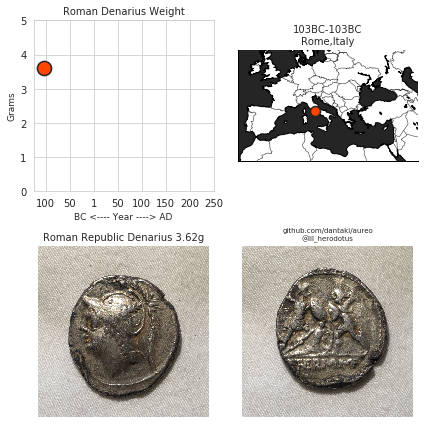

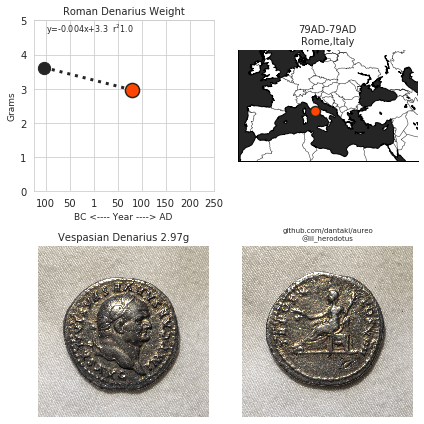

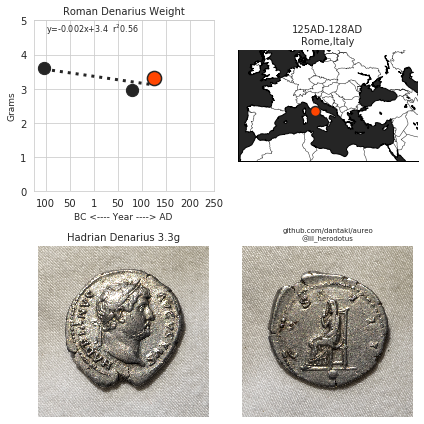

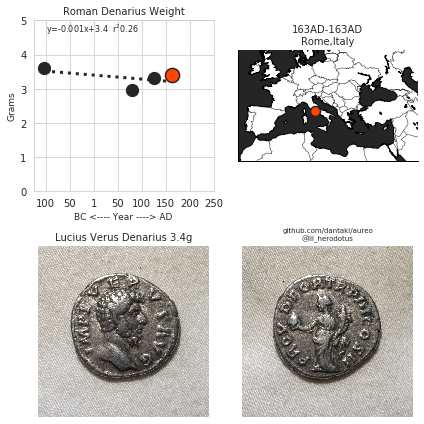

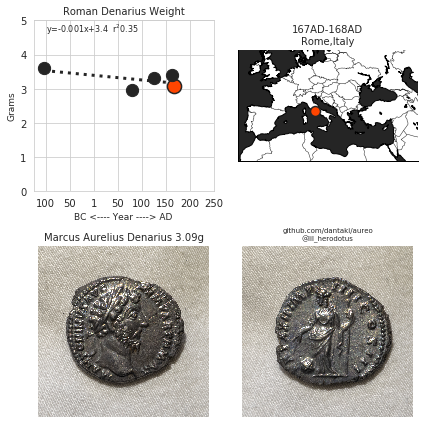

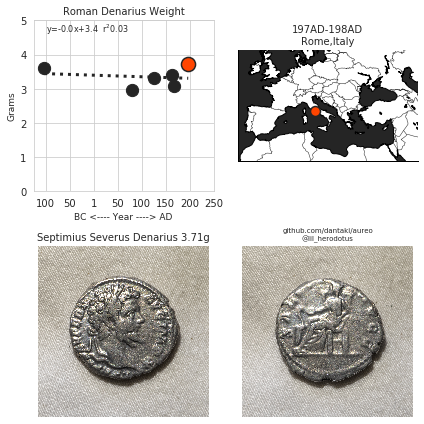

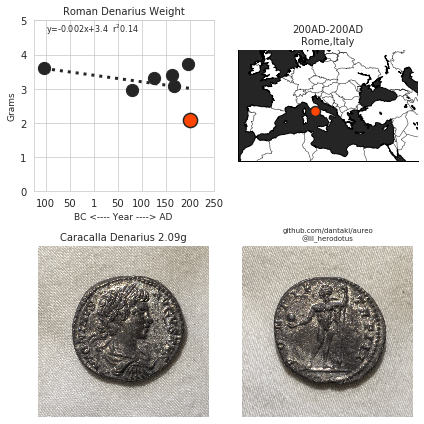

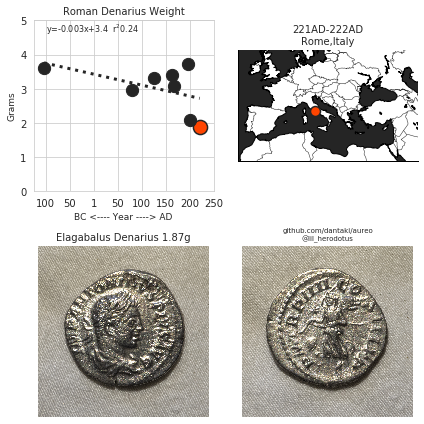

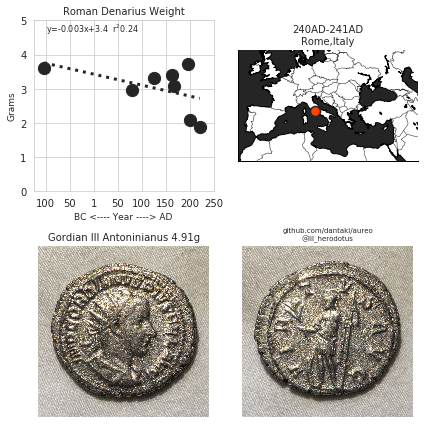

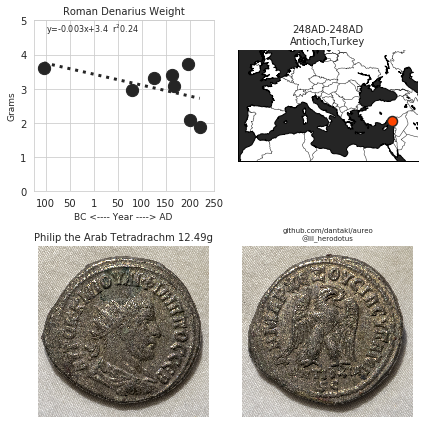

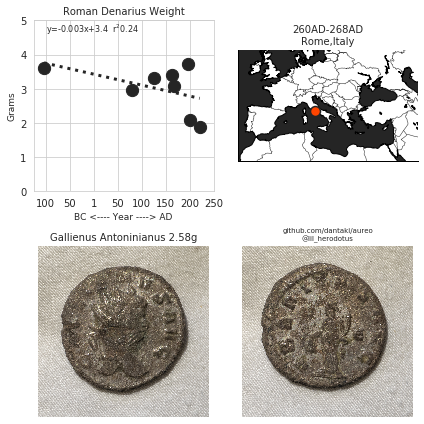

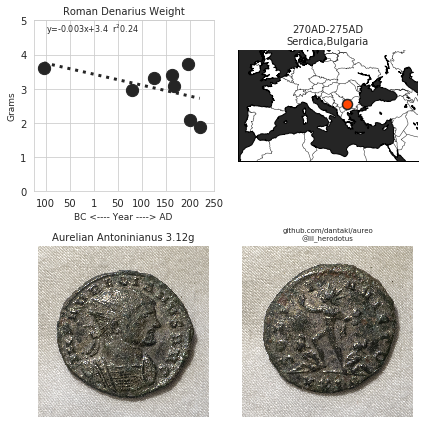

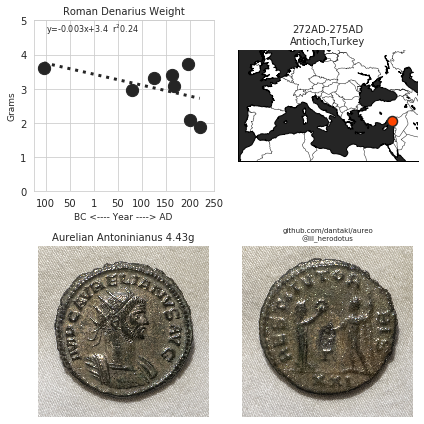

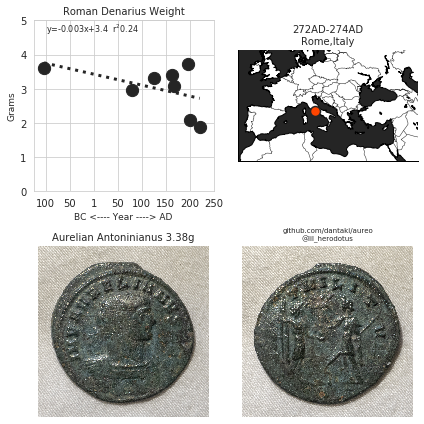

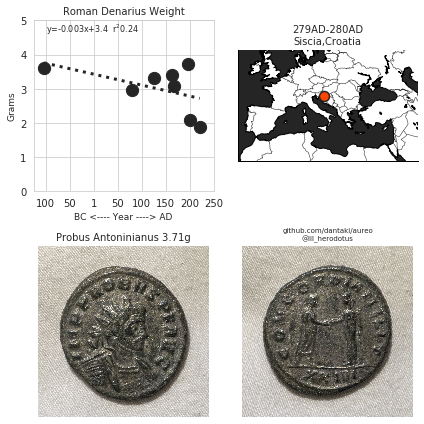

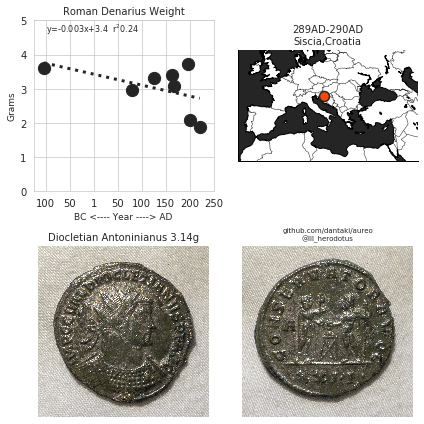

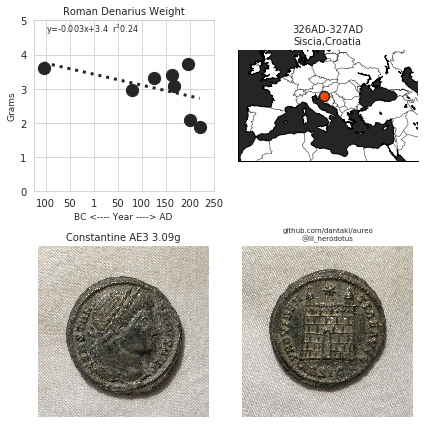

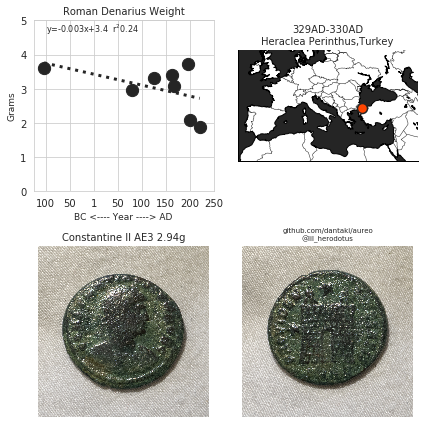

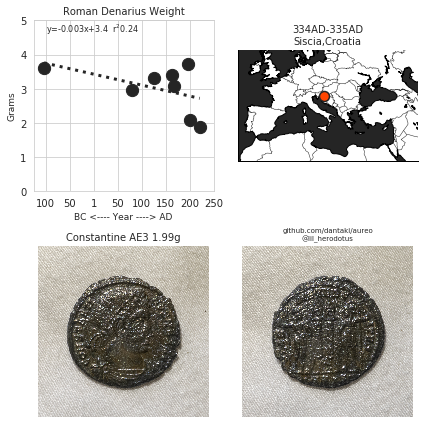

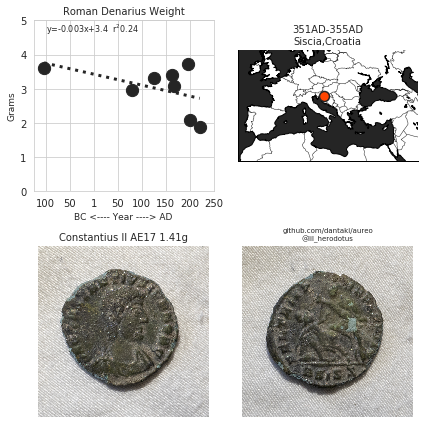

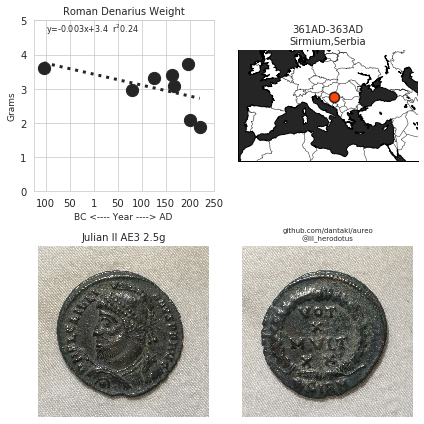

In [3]:
"""
Panel Format:
-------------
Plot  | Map 
Obv   | Rev
-------------
"""
sns.set_style('whitegrid')
img=1
# for each coin, 
for img_pre in df['ImagePrefix']:
    tmp = df.loc[df['ImagePrefix']==img_pre]
    mindate = list(tmp['year'])[0]
    # get all coins from previous years
    # only look at denarii since it's a consistent denomination
    prev = df.loc[(df['year']<mindate) & (df['Denomination']=='Denarius')]
    # draw the figure
    f, ax = plt.subplots(2,2,figsize=(6,6))
    scatter(ax[0,0],prev,tmp)
    map_plot(ax[0,1],tmp)
    plot_coin(ax[1,0],tmp,'obv')
    plot_coin(ax[1,1],tmp,'rev')
    f.tight_layout()
    f.savefig("../FIGURES/{:04d}.png".format(img),dpi=150)
    f.show()
    img+=1
# run this command in the FIGURES/ directory
# ffmpeg -r 1 -f image2 -s 1920x1080 -i %04d.png -vcodec libx264 -crf 25  -pix_fmt yuv420p coins.mp4